In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as st
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [76]:
%%bash

### count reads in Bam for DMSO and EPZ NPC48h

for i in ../../../../reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC*rep*.bam ; do \
echo $(basename $i) | tr "\n" "\t" >> ../INPUT_DATA/counts_NPC48h_consensusSetAllPeaks.txt ; samtools view -c -L ../INPUT_DATA/EnrichedRegions_allMarks_normed_binned.bed $i >> ../INPUT_DATA/counts_NPC48h_consensusSetAllPeaks.txt; done

In [82]:
%%bash

### count reads in Bam for DMSO and EPZ mESC

for i in ../../../../reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC*rep*.bam ; do \
echo $(basename $i) | tr "\n" "\t" >> ../INPUT_DATA/counts_mESC_consensusSetAllPeaks.txt ; samtools view -c -L ../INPUT_DATA/EnrichedRegions_allMarks_normed_binned.bed $i >> ../INPUT_DATA/counts_mESC_consensusSetAllPeaks.txt; done

In [4]:
reads_NPC = pd.read_csv("../INPUT_DATA/counts_NPC48h_consensusSetAllPeaks.txt", sep="\t", names=["sample", "read_counts"])
reads_NPC["rep"] = [i.split("_")[2] for i in reads_NPC["sample"]]
reads_NPC["treat"] = [i.split("_")[1] for i in reads_NPC["sample"]]
reads_NPC["mark"] = [i.split("_")[3].split(".")[0] for i in reads_NPC["sample"]]
reads_NPC

,sample,read_counts,rep,treat,mark
0,iNPC_DMSO_rep1_H3K27ac_merged.filtered.bam,3108668,rep1,DMSO,H3K27ac
1,iNPC_DMSO_rep1_H3K27me3_merged.filtered.bam,4420814,rep1,DMSO,H3K27me3
2,iNPC_DMSO_rep1_H3K36me3_merged.filtered.bam,9271276,rep1,DMSO,H3K36me3
3,iNPC_DMSO_rep1_H3K4me1_merged.filtered.bam,3578157,rep1,DMSO,H3K4me1
4,iNPC_DMSO_rep1_H3K4me3_merged.filtered.bam,4579274,rep1,DMSO,H3K4me3
5,iNPC_DMSO_rep1_H3K79me2_merged.filtered.bam,8726767,rep1,DMSO,H3K79me2
6,iNPC_DMSO_rep1_H3K9me3_merged.filtered.bam,3614519,rep1,DMSO,H3K9me3
7,iNPC_DMSO_rep1_Input.filtered.bam,2378340,rep1,DMSO,Input
8,iNPC_DMSO_rep2_H3K27ac_merged.filtered.bam,6451688,rep2,DMSO,H3K27ac
9,iNPC_DMSO_rep2_H3K27me3_merged.filtered.bam,7173790,rep2,DMSO,H3K27me3


In [5]:
reads_ESC = pd.read_csv("../INPUT_DATA/counts_mESC_consensusSetAllPeaks.txt", sep="\t", names=["sample", "read_counts"])
reads_ESC["rep"] = [i.split("_")[2] for i in reads_ESC["sample"]]
reads_ESC["treat"] = [i.split("_")[1] for i in reads_ESC["sample"]]
reads_ESC["mark"] = [i.split("_")[3].split(".")[0] for i in reads_ESC["sample"]]
reads_ESC

,sample,read_counts,rep,treat,mark
0,mESC_DMSO_rep1_H3K27ac_merged.filtered.bam,32975824,rep1,DMSO,H3K27ac
1,mESC_DMSO_rep1_H3K27me3_merged.filtered.bam,15283463,rep1,DMSO,H3K27me3
2,mESC_DMSO_rep1_H3K36me3_merged.filtered.bam,26342999,rep1,DMSO,H3K36me3
3,mESC_DMSO_rep1_H3K4me1_merged.filtered.bam,18586000,rep1,DMSO,H3K4me1
4,mESC_DMSO_rep1_H3K4me3_merged.filtered.bam,21817453,rep1,DMSO,H3K4me3
5,mESC_DMSO_rep1_H3K79me2_merged.filtered.bam,8199976,rep1,DMSO,H3K79me2
6,mESC_DMSO_rep1_H3K9me3_merged.filtered.bam,10925542,rep1,DMSO,H3K9me3
7,mESC_DMSO_rep1_Input.filtered.bam,9136221,rep1,DMSO,Input
8,mESC_DMSO_rep2_H3K27ac_merged.filtered.bam,45477406,rep2,DMSO,H3K27ac
9,mESC_DMSO_rep2_H3K27me3_merged.filtered.bam,14146795,rep2,DMSO,H3K27me3


-1.1561772845524327
-0.646242374476233


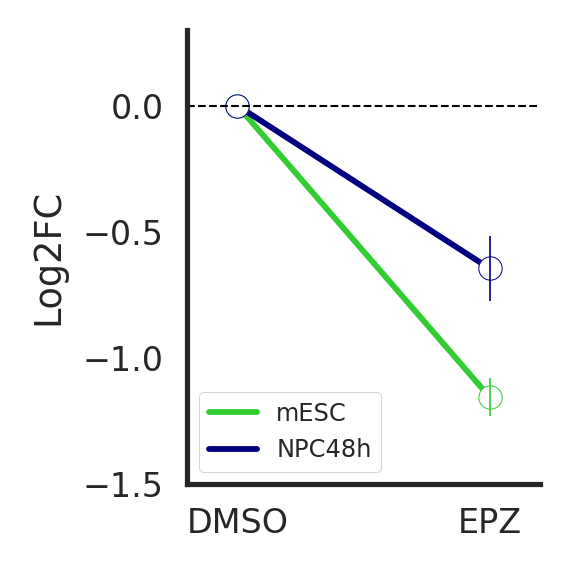

In [8]:
fig,ax = plt.subplots(dpi=300, figsize=(2,2)) 

dfs = [reads_ESC,reads_NPC]
cols=["limegreen","navy"]
labels = ["mESC","NPC48h"]

for p in range(len(dfs)):
    for i in ["H3K79me2"]:
        
        reads = dfs[p]

        inp = reads.loc[reads.mark == "Input"][["read_counts"]]

        markss = reads.loc[reads.mark == i][["read_counts"]]

        norm = markss.values/inp.values

        ratios = []
        for k in norm:
            a = list()
            for j in norm:
                a.append(k/j)
            ratios.append(list(a))
        iNPC = np.mean(np.log2(np.array(ratios)[2:,:2]))
        iNPC_std = np.std(np.log2(np.array(ratios)[2:,:2]))
    
        ax.plot([0,1],[0,iNPC], label = labels[p], zorder=0, color=cols[p])
        ax.errorbar([1],[iNPC],  yerr=iNPC_std, linewidth=0.4, capsize=0, color=cols[p])
        print(iNPC)
        ax.scatter([0,1],[0,iNPC], zorder=1,color=cols[p],edgecolor=cols[p], alpha=1, facecolor='white')

        

        plt.legend(fontsize="xx-small", frameon=True)
plt.ylabel("Log2FC")
ax.set_ylim(-1.5,0.3)
ax.set_xlim(-0.2,1.2)
ax.set_xticks(np.array([0,1]))
ax.set_xticklabels(["DMSO","EPZ"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(0, linewidth=0.5,linestyle='--', color='k')

    
plt.tight_layout()
plt.savefig("../FIGURES/H3K79me2_global_change_mESC_NPC48h.pdf")

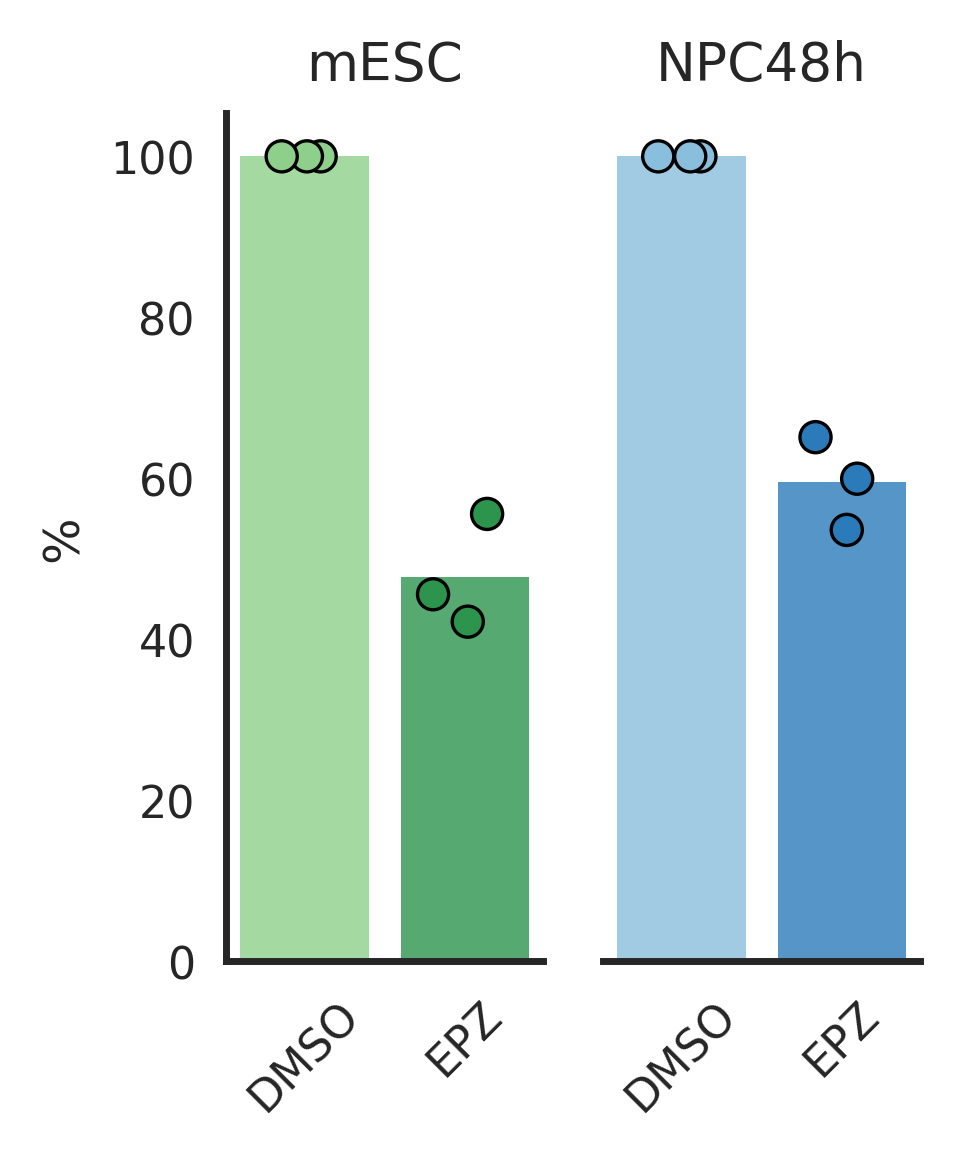

In [20]:
### QUANTIFICATION OF WB ###

fig,ax=plt.subplots(1,2,dpi=400,figsize=(2.5,3), sharey=True)
cols = sns.color_palette("Greens_r").as_hex()
cols = [cols[i] for i in range(4)[::-2]]
cols1 = sns.color_palette("Blues_r").as_hex()
cols1 = [cols1[i] for i in range(4)[::-2]]

data_ESC = (np.array([1,0.826356997,0.998894065, 0.456024314,0.459333096,0.421538331])/np.array([1,0.826356997,0.998894065,1,0.826356997,0.998894065]))*100

ax[0].bar(range(2),[data_ESC[:3].mean(),data_ESC[3:].mean()], color=cols, width=0.8,alpha=0.8)
ax[0].scatter(np.array([0]*3+[1]*3)+st.norm.rvs(0,0.1,6),data_ESC, facecolor=[cols[0]]*3+[cols[1]]*3,edgecolor='k', linewidth=0.6, zorder=10)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

data_NPC = (np.array([1, 0.891848331, 1.378383225, 0.599578311, 0.477994016, 0.897557357]) / np.array([1, 0.891848331, 1.378383225,1, 0.891848331, 1.378383225]))*100

ax[1].bar(range(2),[data_NPC[:3].mean(),data_NPC[3:].mean()], color=cols1, width=0.8,alpha=0.8)
ax[1].scatter(np.array([0]*3+[1]*3)+st.norm.rvs(0,0.1,6),data_NPC, facecolor=[cols1[0]]*3+[cols1[1]]*3,edgecolor='k', linewidth=0.6, zorder=10)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].set_xticks(range(2))
ax[0].set_xticklabels(["DMSO","EPZ"],rotation=45,ha='center')
ax[0].set_title("mESC")
ax[0].set_ylabel("%")

ax[1].set_xticks(range(2))
ax[1].set_xticklabels(["DMSO","EPZ"],rotation=45,ha='center')
ax[1].set_title("NPC48h")
plt.tight_layout()
plt.savefig("../FIGURES/WB_H3K79me2_Loss.pdf")

In [135]:
%%bash

multiBamSummary BED-file \
--BED ../../figure_1-2/INPUT_DATA/3kb_DownTSS_ProteinCoding.bed \
-b /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_*_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_*_H3K79me2_merged.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/mESC_*rep*_Input.filtered.bam \
/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/iNPC_*rep*_Input.filtered.bam \
-o ../INTERMEDIATE_FILES/H3K79me2_NPC48h_vs_mESC.npz \
--outRawCounts ../INTERMEDIATE_FILES/H3K79me2_NPC48h_vs_mESC.counts \
--smartLabels \
-p 20 \
-bl /data/repository/organisms/GRCm38_ensembl/DKFZ/GRCm38_General_readAttractingRegions.UseThisOne.bed \
-e \
--samFlagInclude 2 

Number of bins found: 21965


In [9]:
df = pd.read_csv("../INTERMEDIATE_FILES/H3K79me2_NPC48h_vs_mESC.counts", sep="\t")
list_of_cols = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]]
counts_sumRep = rel.preprocess_deeptools(df,merge_rep=True, list_of_columns=list_of_cols)
cT_inp = rel.Normalize_T(counts_sumRep, log=True, input_norm=True)
cT_inp.columns = ["mESC_DMSO","mESC_EPZ","NPC48h_DMSO","NPC48h_EPZ","mESC_DMSO_inp","mESC_EPZ_inp","NPC48h_DMSO_inp","NPC48h_EPZ_inp"]

/home/ferrari/.local/lib/python3.6/site-packages/RELACS.py:91: RuntimeWarning: divide by zero encountered in log2
  counts_norm = np.log2(counts_norm)


In [10]:
cT_inp

,mESC_DMSO,mESC_EPZ,NPC48h_DMSO,NPC48h_EPZ,mESC_DMSO_inp,mESC_EPZ_inp,NPC48h_DMSO_inp,NPC48h_EPZ_inp
6_108660629_108663629,-0.437064,-1.884523,2.215013,1.770518,7.459432,6.584963,5.807355,6.087463
4_142012082_142015082,-0.736966,-1.772590,0.938599,1.075288,6.321928,6.357552,5.169925,5.807355
4_142081304_142084304,0.592955,-1.048910,1.507795,1.125531,6.906891,6.906891,5.000000,5.459432
11_78162589_78165589,1.151066,-1.247928,3.367371,2.164745,7.266787,6.832890,5.643856,5.954196
11_78173675_78176675,-0.038474,-1.559427,1.347923,1.146841,7.247928,6.807355,5.459432,5.807355
...,...,...,...,...,...,...,...,...
4_130663321_130666321,2.270781,-0.723482,4.182394,3.203442,7.475733,7.149747,6.000000,6.700440
4_149304693_149307693,0.803603,-1.710493,3.581315,2.951456,6.781360,6.169925,6.044394,6.087463
11_89300638_89302332,-1.157541,-0.807355,2.375039,0.308122,5.857981,4.807355,4.000000,5.392317
2_134641145_134644145,-0.284453,-1.332575,2.926998,1.763300,6.569856,6.087463,6.247928,6.247928


In [11]:
cl = pd.read_csv("../../figure_1-2/INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h_5cl.txt",sep="\t")
cl_1 = cl[cl.deepTools_group =="cluster_1"]
cl_2 = cl[cl.deepTools_group =="cluster_2"]
cl_3 = cl[cl.deepTools_group =="cluster_3"]
cl_4 = cl[cl.deepTools_group =="cluster_4"]
cl_5 = cl[cl.deepTools_group =="cluster_5"]

In [12]:
tr = pd.read_csv("../../figure_1-2/INPUT_DATA/3kb_DownTSS_ProteinCoding.bed",sep="\t",header=None, names=["chr","start","end","gene_ID","score","strand","gene_name","length"])
tr.index = tr["gene_ID"]
tr["coord_ID"] = ['{}_{}_{}'.format(tr["chr"][i],tr["start"][i],tr["end"][i]) for i in tr.index]
tr_1 = tr.loc[cl_1.name]
tr_2 = tr.loc[cl_2.name]
tr_3 = tr.loc[cl_3.name]
tr_4 = tr.loc[cl_4.name]
tr_5 = tr.loc[cl_5.name]

-1.0078195044592997
-0.5894084057523479


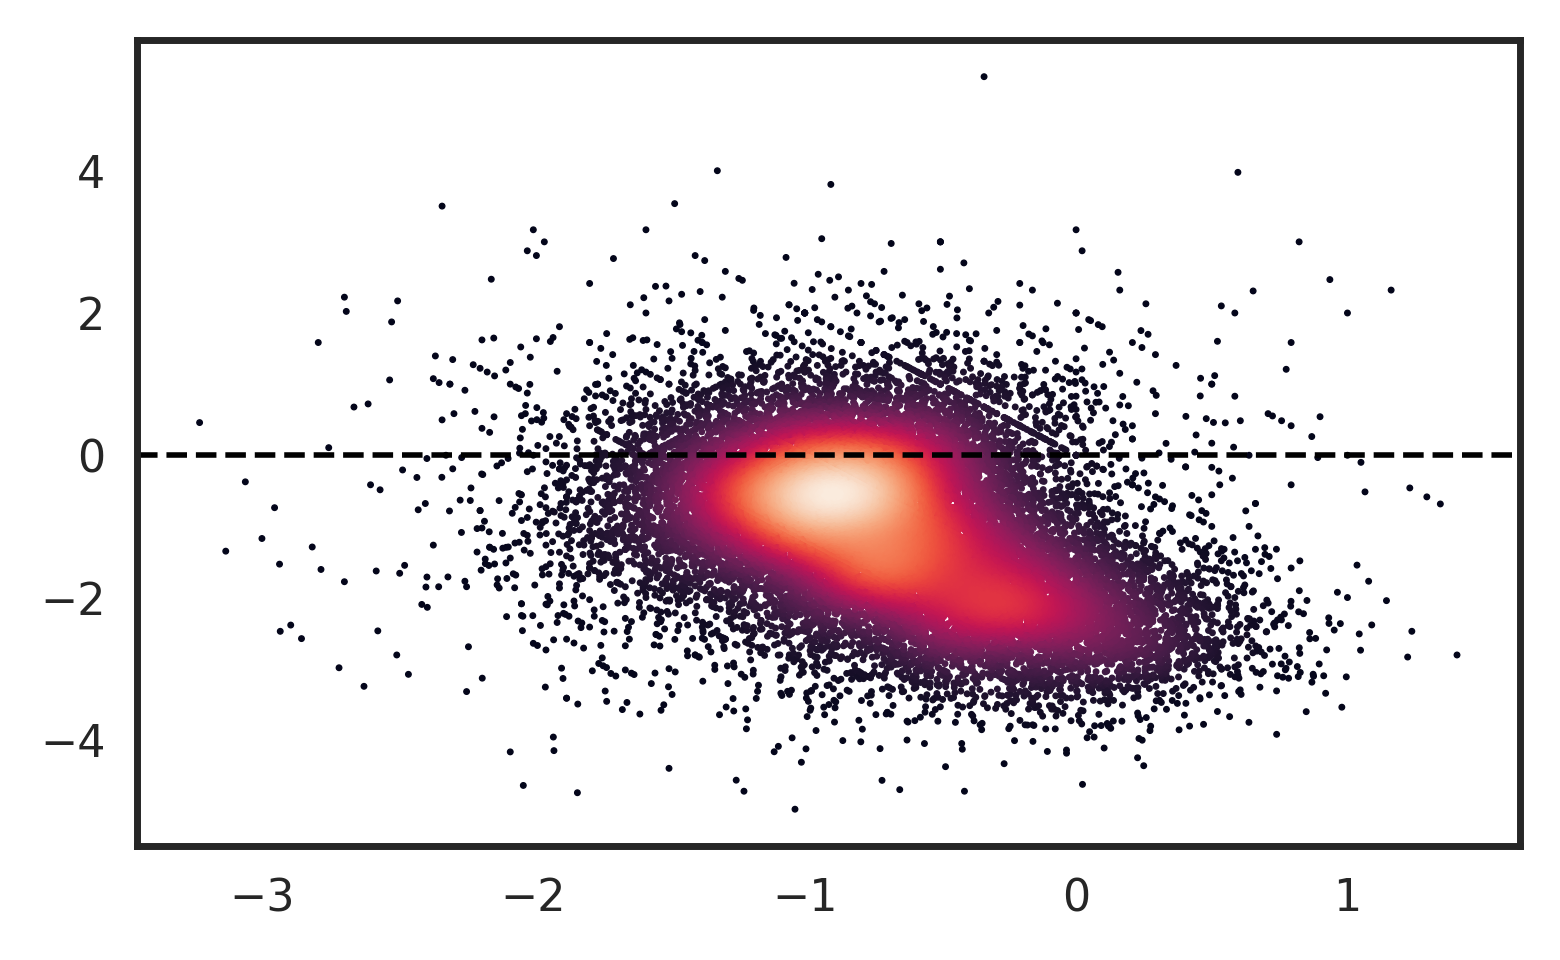

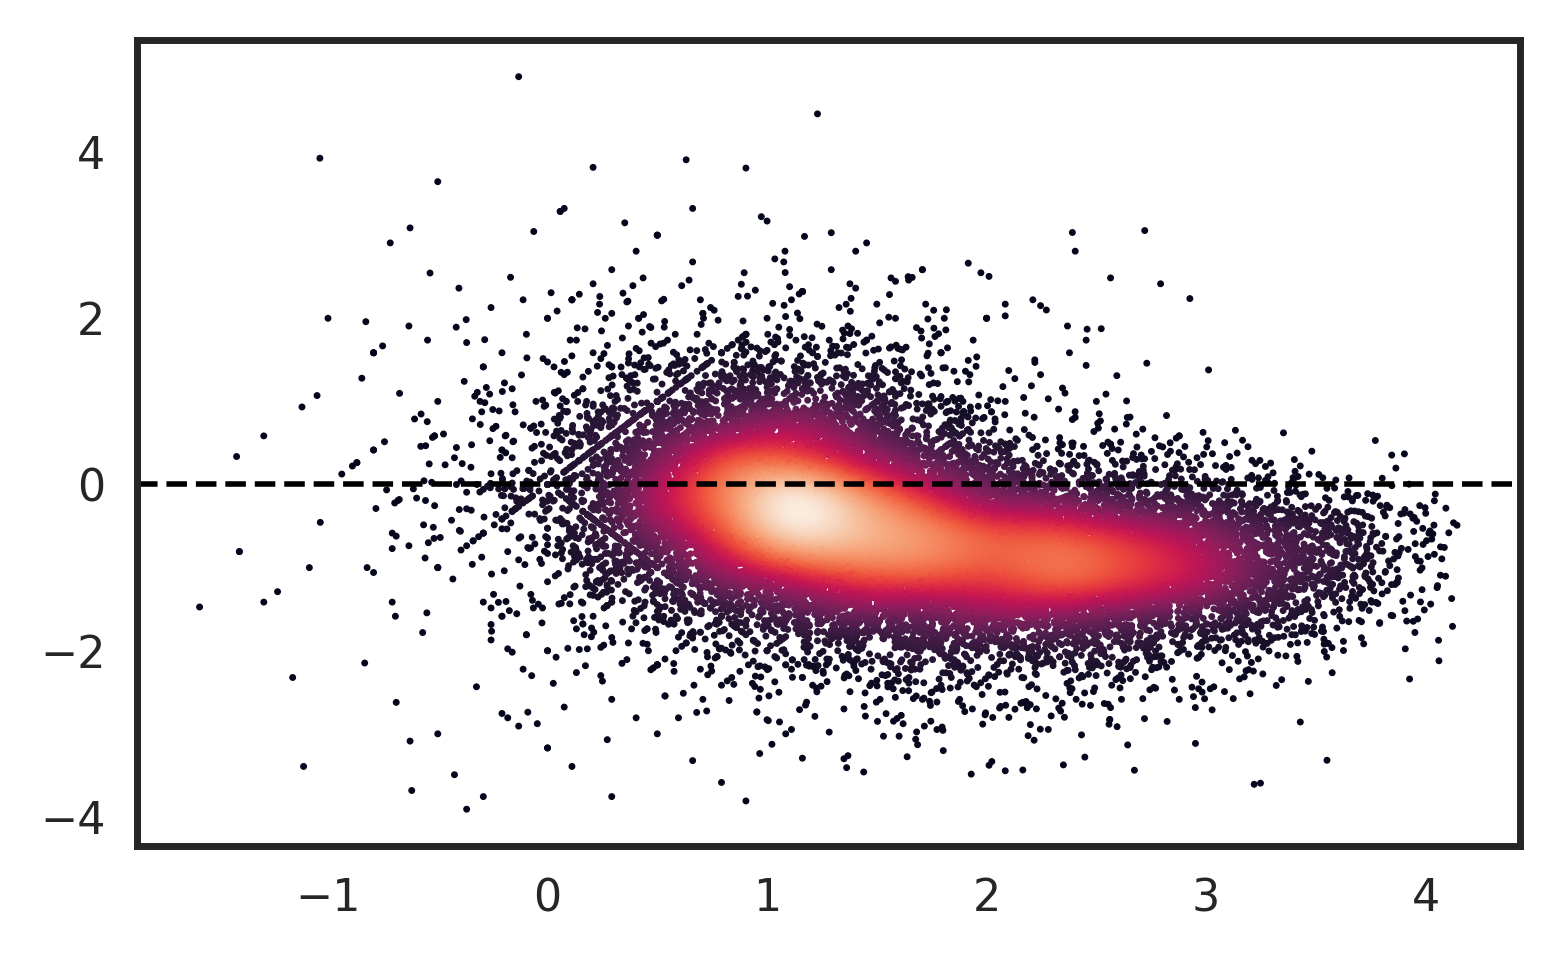

In [13]:
lfc_mESC = rel.MA_samp(cT_inp, ["mESC_DMSO", "mESC_EPZ"])[1]
lfc_NPC48h = rel.MA_samp(cT_inp, ["NPC48h_DMSO", "NPC48h_EPZ"])[1]


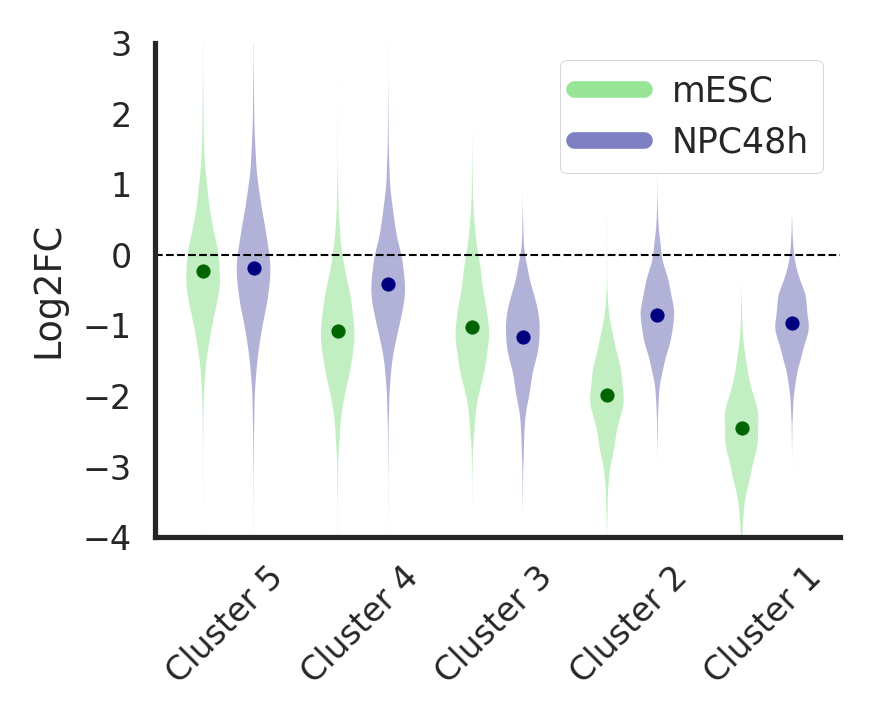

In [17]:
fig,ax=plt.subplots(dpi=300,figsize=(3,2.5))

custom_lines = [Line2D([0], [0], color='limegreen', lw=4,alpha=0.5),
                Line2D([0], [0], color='darkblue', lw=4, alpha=0.5)]

vp_2 = ax.violinplot(np.array([lfc_NPC48h[list(tr_1.coord_ID.values)].dropna(), 
                  lfc_NPC48h[list(tr_2.coord_ID.values)].dropna(), 
                  lfc_NPC48h[list(tr_3.coord_ID.values)].dropna(), 
                  lfc_NPC48h[list(tr_4.coord_ID.values)].dropna(),
                  lfc_NPC48h[list(tr_5.coord_ID.values)].dropna()])[::-1], 
                  np.array(range(0,10,2))+0.75, showmeans=False, showextrema=False)

vp_3 = ax.violinplot(np.array([lfc_mESC[list(tr_1.coord_ID.values)].dropna(), 
                  lfc_mESC[list(tr_2.coord_ID.values)].dropna(), 
                  lfc_mESC[list(tr_3.coord_ID.values)].dropna(), 
                  lfc_mESC[list(tr_4.coord_ID.values)].dropna(),
                  lfc_mESC[list(tr_5.coord_ID.values)].dropna()])[::-1], 
                  np.array(range(0,10,2)), showmeans=False, showextrema=False)

ax.scatter(np.array(range(0,10,2))+0.75, np.array([lfc_NPC48h[list(tr_1.coord_ID.values)].dropna().mean(), 
                  lfc_NPC48h[list(tr_2.coord_ID.values)].dropna().mean(), 
                  lfc_NPC48h[list(tr_3.coord_ID.values)].dropna().mean(), 
                  lfc_NPC48h[list(tr_4.coord_ID.values)].dropna().mean(),
                  lfc_NPC48h[list(tr_5.coord_ID.values)].dropna().mean()])[::-1],s=10,color='navy')

ax.scatter(np.array(range(0,10,2)), np.array([lfc_mESC[list(tr_1.coord_ID.values)].dropna().mean(), 
                  lfc_mESC[list(tr_2.coord_ID.values)].dropna().mean(), 
                  lfc_mESC[list(tr_3.coord_ID.values)].dropna().mean(), 
                  lfc_mESC[list(tr_4.coord_ID.values)].dropna().mean(),
                  lfc_mESC[list(tr_5.coord_ID.values)].dropna().mean()])[::-1],s=10,color='darkgreen')

ax.axhline(0,linestyle="--",linewidth=0.5,color='k')

for i in range(len(vp_2['bodies'])):
    vp_2['bodies'][i].set_facecolor('navy')
    vp_3['bodies'][i].set_facecolor('limegreen')

ax.legend(custom_lines, ['mESC','NPC48h'], fontsize='small', loc=1, frameon=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim((-4,3))
ax.set_ylabel("Log2FC")
plt.xticks(np.array(range(0,10,2))+0.33, np.array(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4','Cluster 5'])[::-1],rotation=45)

plt.tight_layout()

plt.savefig("../FIGURES/H3K79me2_LFC-EPZvsDMSO_violin.pdf")



-0.33130915417615286
-0.13012267211145256
-0.16989598665668712
-0.044954402147118044
-0.1094370554416545
-0.051730663179535535
-0.646242374476233
0.0


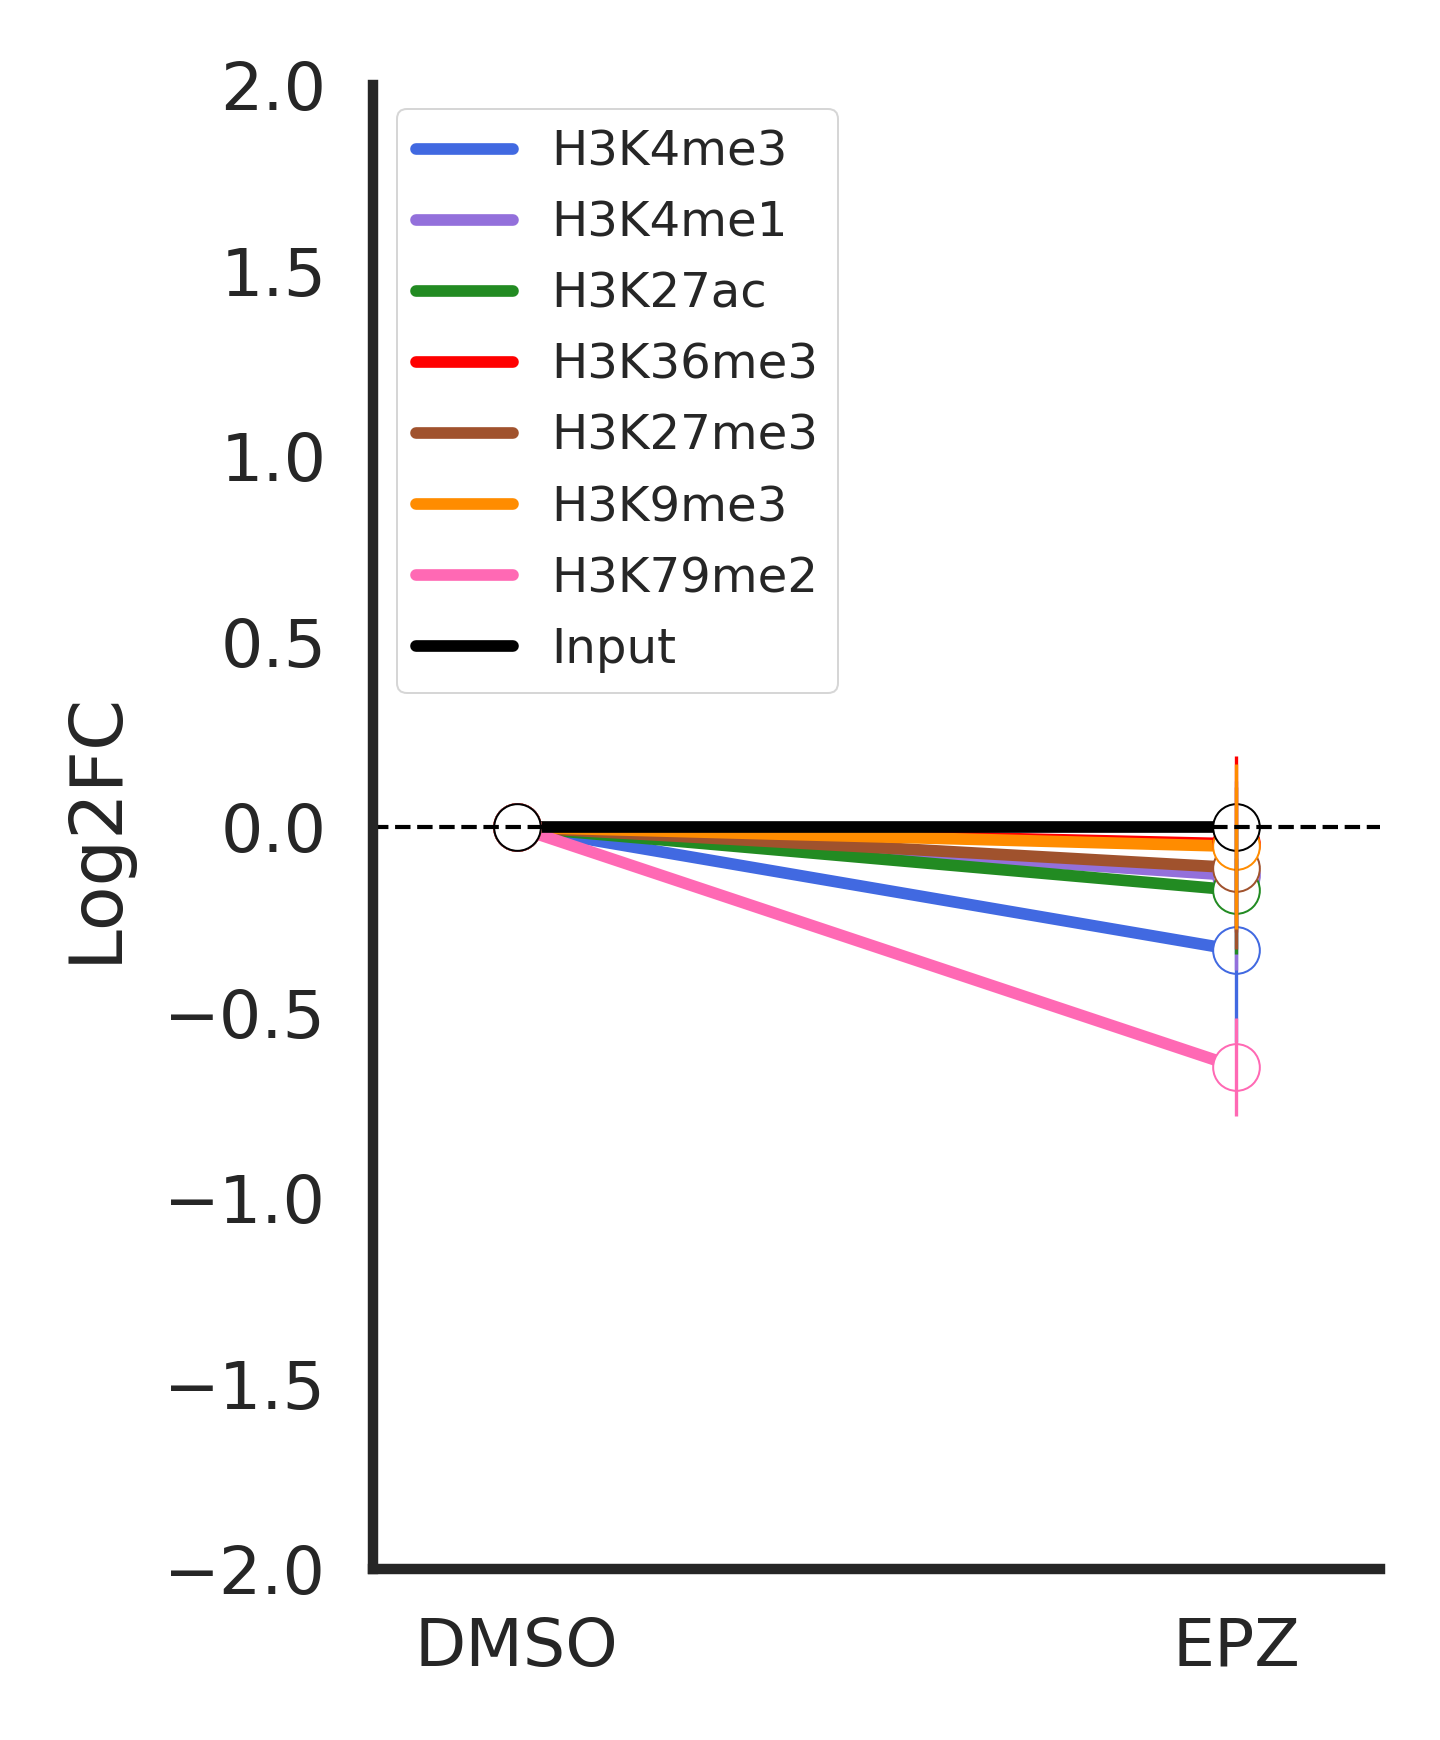

In [182]:
fig,ax = plt.subplots(dpi=600, figsize=(2.5,3))

cols={"H3K4me3":'royalblue',
      "H3K4me1":'mediumpurple',
      "H3K27ac":'forestgreen',
      "H3K36me3":'r',
      "H3K27me3":'sienna',
      "H3K9me3":'darkorange',
      "H3K79me2":'hotpink',
      "Input":'k'}

for i in ["H3K4me3","H3K4me1","H3K27ac","H3K36me3","H3K27me3","H3K9me3","H3K79me2","Input"]:#set(list(df_wt.mark)):
    
    inp = reads_NPC.loc[reads.mark == "Input"][["read_counts"]]
    

    markss = reads_NPC.loc[reads.mark == i][["read_counts"]]
#     print(markss)

    norm = markss.values/inp.values
    
   
    ratios = []
    for k in norm:
        a = list()
        for j in norm:
            a.append(k/j)
        ratios.append(list(a))
    iNPC = np.mean(np.log2(np.array(ratios)[2:,:2]))
    iNPC_std = np.std(np.log2(np.array(ratios)[2:,:2]))
#     mESC = np.mean(np.log2(np.array(ratios)[2:,:2]))
   
    ax.plot([0,1],[0,iNPC], label = i, zorder=0, color=cols[i])
    ax.errorbar([1],[iNPC],  yerr=iNPC_std, linewidth=0.4, capsize=0, color=cols[i])
    print(iNPC)
    ax.scatter([0,1],[0,iNPC], zorder=1,color=cols[i],edgecolor=cols[i], alpha=1, facecolor='white')
    
    ax.set_xticks(np.array([0,1]))
    ax.set_xticklabels(["DMSO","EPZ"])

    ax.legend(fontsize="xx-small", loc=2, frameon=True)
ax.set_ylabel("Log2FC")
ax.set_ylim(-2,2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("differentiation trajectory")
#plt.annotate('', xy=(0.2, -0.1), xycoords='axes fraction', xytext=(0.8, -0.1), 
            #arrowprops=dict(arrowstyle="<-", color='k'))
#plt.title("NPC48h")
ax.set_xlim(-0.2,1.2)
ax.axhline(0, linewidth=0.5,linestyle='--', color='k')
plt.tight_layout()

plt.savefig("../FIGURES/Global_Change_NPC48h_EPZvsDMSO.pdf")

-0.22184929387921876
-0.14013744324049743
0.03218672251744553
-0.18845854811891843
-0.04795532910608634
-0.06264318091248795
-1.1561772845524327
0.0


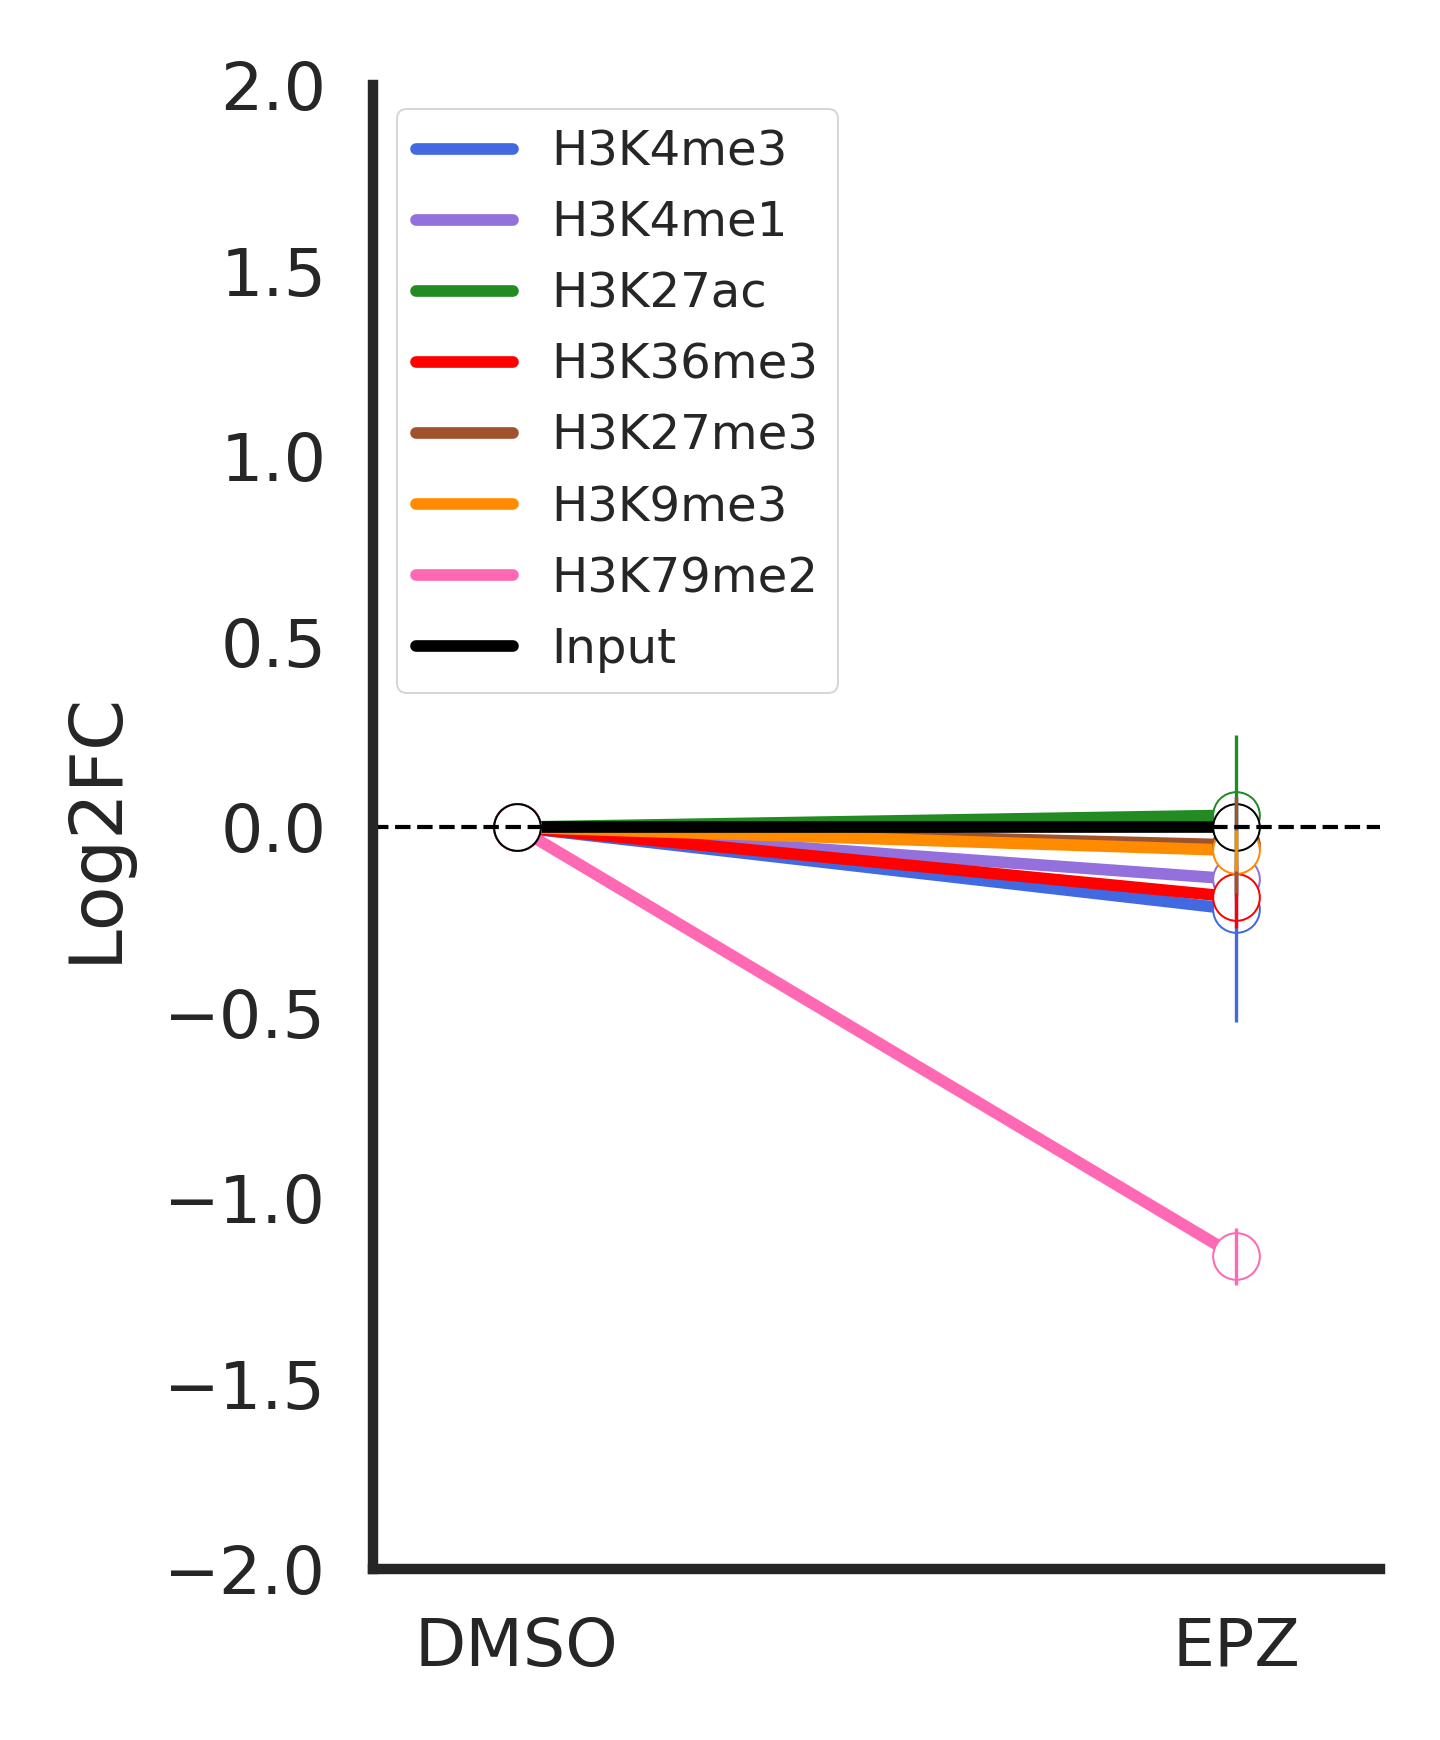

In [183]:
fig,ax = plt.subplots(dpi=600, figsize=(2.5,3))

cols={"H3K4me3":'royalblue',
      "H3K4me1":'mediumpurple',
      "H3K27ac":'forestgreen',
      "H3K36me3":'r',
      "H3K27me3":'sienna',
      "H3K9me3":'darkorange',
      "H3K79me2":'hotpink',
      "Input":'k'}

for i in ["H3K4me3","H3K4me1","H3K27ac","H3K36me3","H3K27me3","H3K9me3","H3K79me2","Input"]:
    
    inp = reads_ESC.loc[reads.mark == "Input"][["read_counts"]]
    

    markss = reads_ESC.loc[reads.mark == i][["read_counts"]]
#     print(markss)

    norm = markss.values/inp.values
    
   
    ratios = []
    for k in norm:
        a = list()
        for j in norm:
            a.append(k/j)
        ratios.append(list(a))
    iNPC = np.mean(np.log2(np.array(ratios)[2:,:2]))
    iNPC_std = np.std(np.log2(np.array(ratios)[2:,:2]))
#     mESC = np.mean(np.log2(np.array(ratios)[2:,:2]))
   
    ax.plot([0,1],[0,iNPC], label = i, zorder=0, color=cols[i])
    ax.errorbar([1],[iNPC],  yerr=iNPC_std, linewidth=0.4, capsize=0, color=cols[i])
    print(iNPC)
    ax.scatter([0,1],[0,iNPC], zorder=1,color=cols[i],edgecolor=cols[i], alpha=1, facecolor='white')
    
    ax.set_xticks(np.array([0,1]))
    ax.set_xticklabels(["DMSO","EPZ"])

    ax.legend(fontsize="xx-small", loc=2, frameon=True)
ax.set_ylabel("Log2FC")
ax.set_ylim(-2,2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("differentiation trajectory")
#plt.annotate('', xy=(0.2, -0.1), xycoords='axes fraction', xytext=(0.8, -0.1), 
            #arrowprops=dict(arrowstyle="<-", color='k'))
#plt.title("NPC48h")
ax.set_xlim(-0.2,1.2)
ax.axhline(0, linewidth=0.5,linestyle='--', color='k')
plt.tight_layout()

plt.savefig("../FIGURES/Global_Change_mESC_EPZvsDMSO.pdf")
